In [597]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler  # стандартизация данных
from sklearn.preprocessing import MinMaxScaler    # масштабирование MinMaxScaler
from sklearn.preprocessing import Normalizer      # масштабирование Normalizer

In [598]:
path_train = '/home/tefi/Homework/Project/course_project_train.csv'
path_test = '/home/tefi/Homework/Project/course_project_test.csv'

In [599]:
train = pd.read_csv(path_train)
test = pd.read_csv(path_test) 

Описание датасета:
Home Ownership - домовладение
Annual Income - годовой доход
Years in current job - количество лет на текущем месте работы
Tax Liens - налоговые обременения
Number of Open Accounts - количество открытых счетов
Years of Credit History - количество лет кредитной истории
Maximum Open Credit - наибольший открытый кредит
Number of Credit Problems - количество проблем с кредитом
Months since last delinquent - количество месяцев с последней просрочки платежа
Bankruptcies - банкротства
Purpose - цель кредита
Term - срок кредита
Current Loan Amount - текущая сумма кредита
Current Credit Balance - текущий кредитный баланс
Monthly Debt - ежемесячный долг
Credit Score - кредитный рейтинг (“Баллы Доверия”) это трехзначное число в диапазоне от 300 до 900
Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [600]:
train_data = train.copy()
train_data = train_data.drop(['Credit Default'], axis ='columns')  # тренировочные данные без целевой переменной
train_target = train.copy()
train_target = train['Credit Default']                             # целевая переменная для тренировочных данных
test_data = test.copy()                                            # тестовые данные

In [601]:
train_data.head(2)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0


In [602]:
train_target.head(2)

0    0
1    1
Name: Credit Default, dtype: int64

In [603]:
test_data.head(2)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0


In [604]:
# оценка данных в целевой переменной - коррекция не требуется
train_target.shape

(7500,)

In [605]:
train_target.value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [606]:
# оценка тренировочных и тестовых данных - кол-во признаков совпадает
train_data.shape

(7500, 16)

In [607]:
test_data.shape

(2500, 16)

In [608]:
# Приведение типов к необходимым
train_data.dtypes

Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
dtype: object

In [609]:
# 'Years in current job' - необходимо перевести в числовой тип
train_data['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [610]:
train_data.loc[(train_data['Years in current job']=='< 1 year'), 'Years in current job'] = 0
train_data.loc[(train_data['Years in current job']=='1 year'), 'Years in current job'] = 1
train_data.loc[(train_data['Years in current job']=='2 years'), 'Years in current job'] = 2
train_data.loc[(train_data['Years in current job']=='3 years'), 'Years in current job'] = 3
train_data.loc[(train_data['Years in current job']=='4 years'), 'Years in current job'] = 4
train_data.loc[(train_data['Years in current job']=='5 years'), 'Years in current job'] = 5
train_data.loc[(train_data['Years in current job']=='6 years'), 'Years in current job'] = 6
train_data.loc[(train_data['Years in current job']=='7 years'), 'Years in current job'] = 7
train_data.loc[(train_data['Years in current job']=='8 years'), 'Years in current job'] = 8
train_data.loc[(train_data['Years in current job']=='9 years'), 'Years in current job'] = 9
train_data.loc[(train_data['Years in current job']=='10+ years'), 'Years in current job'] = 10

In [611]:
train_data['Years in current job'] = train_data['Years in current job'].astype(float)
train_data['Years in current job'].value_counts()

10.0    2332
2.0      705
3.0      620
0.0      563
5.0      516
1.0      504
4.0      469
6.0      426
7.0      396
8.0      339
9.0      259
Name: Years in current job, dtype: int64

In [612]:
test_data.loc[(test_data['Years in current job']=='< 1 year'), 'Years in current job'] = 0
test_data.loc[(test_data['Years in current job']=='1 year'), 'Years in current job'] = 1
test_data.loc[(test_data['Years in current job']=='2 years'), 'Years in current job'] = 2
test_data.loc[(test_data['Years in current job']=='3 years'), 'Years in current job'] = 3
test_data.loc[(test_data['Years in current job']=='4 years'), 'Years in current job'] = 4
test_data.loc[(test_data['Years in current job']=='5 years'), 'Years in current job'] = 5
test_data.loc[(test_data['Years in current job']=='6 years'), 'Years in current job'] = 6
test_data.loc[(test_data['Years in current job']=='7 years'), 'Years in current job'] = 7
test_data.loc[(test_data['Years in current job']=='8 years'), 'Years in current job'] = 8
test_data.loc[(test_data['Years in current job']=='9 years'), 'Years in current job'] = 9
test_data.loc[(test_data['Years in current job']=='10+ years'), 'Years in current job'] = 10
test_data['Years in current job'] = test_data['Years in current job'].astype(float)
test_data.dtypes

Home Ownership                   object
Annual Income                   float64
Years in current job            float64
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
dtype: object

In [613]:
# анализ данных показывает, что текущая сумма кредита не всегда больше текущего кредитного баланса, 
# что логически неверно. Вероятнее всего, что эти цифры перепутаны местами
train_data.loc[(train_data['Current Loan Amount'] < train_data['Current Credit Balance'])]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
1,Own Home,1025487.0,10.0,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0
13,Rent,2066364.0,10.0,0.0,11.0,17.7,1654026.0,0.0,NaN,0.0,debt consolidation,Long Term,549780.0,1037077.0,21869.0,728.0
14,Own Home,2258796.0,7.0,0.0,11.0,17.7,1602546.0,0.0,NaN,0.0,other,Short Term,185262.0,1374327.0,58352.0,748.0
16,Rent,NaN,7.0,0.0,6.0,17.8,899492.0,0.0,NaN,0.0,debt consolidation,Long Term,313038.0,538346.0,18844.0,NaN
17,Home Mortgage,3361898.0,3.0,0.0,14.0,28.5,1042096.0,0.0,NaN,0.0,debt consolidation,Long Term,498872.0,689396.0,52249.0,644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Own Home,1721932.0,10.0,0.0,9.0,28.0,912142.0,0.0,NaN,0.0,debt consolidation,Short Term,105490.0,723957.0,37022.0,739.0
7482,Home Mortgage,NaN,10.0,0.0,14.0,30.5,645062.0,0.0,45.0,0.0,debt consolidation,Short Term,188430.0,518662.0,23506.0,NaN
7486,Rent,5327372.0,1.0,0.0,7.0,12.1,605638.0,0.0,NaN,0.0,debt consolidation,Short Term,111760.0,292904.0,8080.0,750.0
7496,Home Mortgage,1533984.0,1.0,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,7410.0


In [614]:
train_data.loc[(train_data['Current Loan Amount'] < train_data['Current Credit Balance']), ['Current Loan Amount']] = train['Current Credit Balance']

In [615]:
train_data.loc[(train_data['Current Loan Amount'] == train_data['Current Credit Balance']), ['Current Credit Balance']] = train['Current Loan Amount']

In [616]:
train_data.loc[(train_data['Current Loan Amount'] < train_data['Current Credit Balance'])]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score


In [617]:
train_data.loc[(train_data.index == 13)]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
13,Rent,2066364.0,10.0,0.0,11.0,17.7,1654026.0,0.0,NaN,0.0,debt consolidation,Long Term,1037077.0,549780.0,21869.0,728.0


In [618]:
test_data.loc[(test_data['Current Loan Amount'] < test_data['Current Credit Balance'])]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
5,Home Mortgage,922583.0,5.0,0.0,26.0,17.5,713174.0,0.0,41.0,0.0,debt consolidation,Short Term,94028.0,135508.0,11148.0,679.0
8,Rent,NaN,5.0,0.0,8.0,9.1,370524.0,0.0,NaN,0.0,major purchase,Short Term,131956.0,237747.0,10112.0,NaN
12,Home Mortgage,1054614.0,2.0,0.0,11.0,14.0,306328.0,0.0,69.0,0.0,debt consolidation,Short Term,155408.0,202388.0,14940.0,7030.0
13,Rent,1232530.0,3.0,0.0,15.0,14.7,441518.0,0.0,NaN,0.0,debt consolidation,Short Term,210782.0,228399.0,29889.0,720.0
15,Rent,1118302.0,10.0,0.0,16.0,27.1,676720.0,0.0,NaN,0.0,debt consolidation,Short Term,372834.0,506103.0,23671.0,711.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,Home Mortgage,NaN,10.0,0.0,24.0,36.6,3341228.0,0.0,NaN,0.0,debt consolidation,Short Term,455950.0,1255235.0,44682.0,NaN
2489,Own Home,950589.0,6.0,0.0,9.0,21.3,611182.0,0.0,NaN,0.0,debt consolidation,Short Term,258984.0,360525.0,11724.0,740.0
2496,Home Mortgage,NaN,2.0,0.0,15.0,17.0,1737780.0,0.0,77.0,0.0,debt consolidation,Short Term,468512.0,1439269.0,32996.0,NaN
2497,Home Mortgage,1171806.0,2.0,0.0,48.0,12.8,1706430.0,0.0,NaN,0.0,debt consolidation,Short Term,430496.0,676438.0,36912.0,695.0


In [619]:
test_data.loc[(test_data['Current Loan Amount'] < test_data['Current Credit Balance']), ['Current Loan Amount']] = test['Current Credit Balance']

In [620]:
test_data.loc[(test_data['Current Loan Amount'] == test_data['Current Credit Balance']), ['Current Credit Balance']] = test['Current Loan Amount']

In [621]:
test_data.loc[(test_data['Current Loan Amount'] < test_data['Current Credit Balance'])]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score


In [622]:
# обработка выбросов
train_data.describe()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,5.943000e+03,7129.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000
mean,1.366392e+06,5.880348,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.193994e+07,2.230703e+05,18314.454133,1151.087498
std,8.453392e+05,3.620092,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.190275e+07,1.931518e+05,11926.764673,1604.451418
min,1.645970e+05,0.000000,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000
25%,8.443410e+05,3.000000,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,2.198240e+05,1.016025e+05,10067.500000,711.000000
50%,1.168386e+06,6.000000,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.497010e+05,1.785850e+05,16076.500000,731.000000
75%,1.640137e+06,10.000000,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,6.074922e+05,2.967198e+05,23818.000000,743.000000
max,1.014934e+07,10.000000,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,4.249673e+06,136679.000000,7510.000000


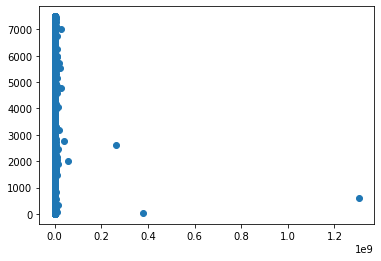

In [623]:
# явный выброс
plt.scatter(train_data['Maximum Open Credit'], train_data.index)

In [624]:
train_data.loc[(train_data['Maximum Open Credit'] == train_data['Maximum Open Credit'].max(), ['Maximum Open Credit'])] = train_data['Current Loan Amount']

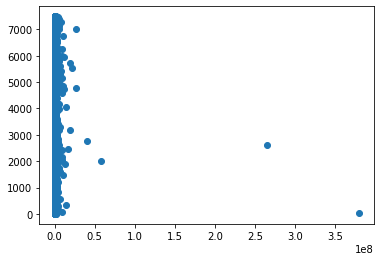

In [625]:
plt.scatter(train_data['Maximum Open Credit'], train_data.index)

In [626]:
# тоже явный выброс
train_data.loc[(train_data['Maximum Open Credit'] == train_data['Maximum Open Credit'].max())]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
44,Have Mortgage,1334256.0,10.0,0.0,17.0,15.4,380052288.0,1.0,35.0,0.0,take a trip,Short Term,656450.0,33110.0,34357.0,729.0


In [627]:
train_data.loc[(train_data['Maximum Open Credit'] == train_data['Maximum Open Credit'].max(), ['Maximum Open Credit'])] = train_data['Current Loan Amount']

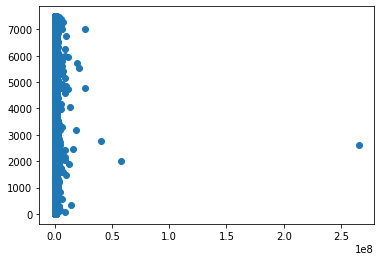

In [628]:
plt.scatter(train_data['Maximum Open Credit'], train_data.index)

In [629]:
# выброс
train_data.loc[(train_data['Maximum Open Credit'] == train_data['Maximum Open Credit'].max())]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
2617,Home Mortgage,3217802.0,10.0,0.0,12.0,35.5,265512874.0,0.0,NaN,0.0,other,Short Term,1834450.0,50116.0,20272.0,750.0


In [630]:
train_data.loc[(train_data['Maximum Open Credit'] == train_data['Maximum Open Credit'].max(), ['Maximum Open Credit'])] = train_data['Current Loan Amount']

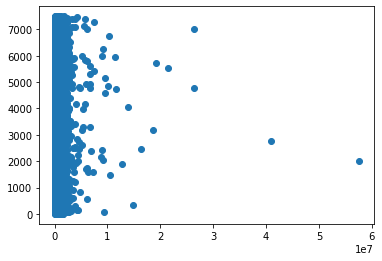

In [631]:
plt.scatter(train_data['Maximum Open Credit'], train_data.index)

In [632]:
# дальнейшие максимальные значения нельзя однозначно признать выбросами
train_data.loc[(train_data['Maximum Open Credit'] == train_data['Maximum Open Credit'].max())]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
2023,Rent,1342825.0,10.0,0.0,12.0,16.3,57562560.0,0.0,NaN,0.0,other,Short Term,944547.0,166826.0,9176.0,749.0


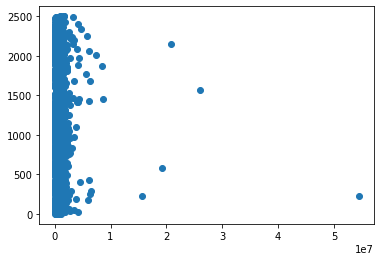

In [633]:
# проверяем тестовую выборку - явных выбросов нет
plt.scatter(test_data['Maximum Open Credit'], test_data.index)

In [634]:
test_data.loc[(test_data['Maximum Open Credit'] == test_data['Maximum Open Credit'].max())]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
228,Home Mortgage,3356255.0,10.0,0.0,20.0,17.2,54484386.0,0.0,NaN,0.0,home improvements,Long Term,5176018.0,777238.0,42792.0,695.0


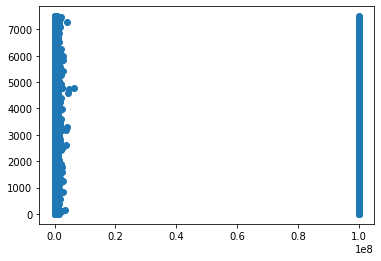

In [635]:
# явные выбросы
plt.scatter(train_data['Current Loan Amount'], train_data.index)

In [636]:
train_data.loc[(train_data['Current Loan Amount'] == train_data['Current Loan Amount'].max())]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0
2,Home Mortgage,751412.0,8.0,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0
6,Home Mortgage,1511108.0,10.0,0.0,9.0,20.3,388124.0,0.0,73.0,0.0,home improvements,Short Term,99999999.0,51623.0,2317.0,745.0
22,Rent,463790.0,NaN,0.0,6.0,28.3,288442.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,157700.0,5063.0,738.0
27,Rent,1004055.0,8.0,0.0,7.0,14.5,328394.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,195966.0,6041.0,734.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7441,Rent,1406836.0,1.0,0.0,12.0,22.6,2383260.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,461054.0,7386.0,747.0
7445,Home Mortgage,1564384.0,6.0,0.0,21.0,17.3,1545016.0,0.0,NaN,0.0,other,Long Term,99999999.0,1043442.0,32461.0,728.0
7464,Home Mortgage,1159152.0,6.0,0.0,14.0,22.0,389356.0,1.0,77.0,1.0,debt consolidation,Short Term,99999999.0,49438.0,18257.0,737.0
7475,Rent,848426.0,10.0,0.0,8.0,20.1,526306.0,0.0,12.0,0.0,debt consolidation,Short Term,99999999.0,83638.0,16473.0,742.0


In [637]:
# вычисляем медиану кол-ва месяцев на которые брались короткие кредиты
train_temp = train_data.loc[(train_data['Term'] == 'Short Term')]
month_median_short = train_temp['Current Loan Amount'].median() / train_temp['Monthly Debt'].median()
month_median_short

20.727539322847242

In [638]:
# в том случае, когда медиана месяцев * ежемесечный платеж не превышает текущий кредитный баланс
# заменяем выбросы текущей суммы кредита (короткий срок) на ежемесечный платеж * на медиану кол-ва месяцев
# на которые брались короткие кредиты
# в противоположном случае выбросы текущей суммы кредита приравниваем к текущему кредитному балансу
train_data.loc[(train_data['Current Loan Amount'] == train_data['Current Loan Amount'].max()) 
               & (train_data['Term'] == 'Short Term')
               & (train_data['Monthly Debt'] * month_median_short > train_data['Current Credit Balance']),
               ['Current Loan Amount']] = train_data['Monthly Debt'] * month_median_short

In [639]:
train_data.loc[(train_data['Current Loan Amount'] == train_data['Current Loan Amount'].max()) 
               & (train_data['Term'] == 'Short Term')
               & (train_data['Monthly Debt'] * month_median_short <= train_data['Current Credit Balance']),
               ['Current Loan Amount']] = train_data['Current Credit Balance']

In [640]:
train_data.loc[(train_data['Current Loan Amount'] == train_data['Current Loan Amount'].max())]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
31,Own Home,1289796.0,10.0,0.0,11.0,20.5,845548.0,0.0,NaN,0.0,debt consolidation,Long Term,99999999.0,640433.0,26549.0,708.0
61,Home Mortgage,866476.0,1.0,0.0,15.0,12.9,239800.0,0.0,NaN,0.0,debt consolidation,Long Term,99999999.0,130891.0,11770.0,701.0
110,Rent,1131545.0,3.0,0.0,14.0,14.6,602954.0,0.0,44.0,0.0,debt consolidation,Long Term,99999999.0,216106.0,12258.0,734.0
160,Rent,756276.0,2.0,0.0,5.0,16.7,525778.0,0.0,NaN,0.0,other,Long Term,99999999.0,53580.0,1683.0,739.0
166,Home Mortgage,4580976.0,4.0,0.0,18.0,25.5,1553530.0,0.0,NaN,0.0,debt consolidation,Long Term,99999999.0,633289.0,94674.0,727.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7320,Own Home,1277275.0,10.0,0.0,6.0,19.3,221760.0,0.0,36.0,0.0,home improvements,Long Term,99999999.0,69521.0,8749.0,694.0
7334,Own Home,816506.0,10.0,0.0,14.0,19.6,2277638.0,0.0,14.0,0.0,buy a car,Long Term,99999999.0,1327777.0,21638.0,717.0
7344,Rent,3105056.0,10.0,0.0,11.0,12.3,754622.0,0.0,NaN,0.0,debt consolidation,Long Term,99999999.0,387125.0,35449.0,687.0
7431,Rent,1065463.0,1.0,0.0,7.0,10.9,223036.0,0.0,NaN,0.0,debt consolidation,Long Term,99999999.0,179512.0,17669.0,649.0


In [641]:
# повторяем обработку выбросов текущей суммы кредита на ДЛИННЫЙ срок.
train_temp = train_data.loc[(train_data['Term'] == 'Long Term')]
month_median_long = train_temp['Current Loan Amount'].median() / train_temp['Monthly Debt'].median()
month_median_long

24.323277098380746

In [642]:
train_data.loc[(train_data['Current Loan Amount'] == train_data['Current Loan Amount'].max()) 
               & (train_data['Term'] == 'Long Term')
               & (train_data['Monthly Debt'] * month_median_long > train_data['Current Credit Balance']),
               ['Current Loan Amount']] = train_data['Monthly Debt'] * month_median_long

In [643]:
train_data.loc[(train_data['Current Loan Amount'] == train_data['Current Loan Amount'].max()) 
               & (train_data['Term'] == 'Long Term')
               & (train_data['Monthly Debt'] * month_median_long <= train_data['Current Credit Balance']),
               ['Current Loan Amount']] = train_data['Current Credit Balance']

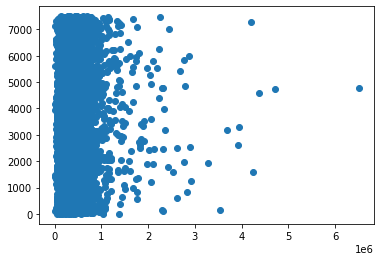

In [644]:
plt.scatter(train_data['Current Loan Amount'], train_data.index)

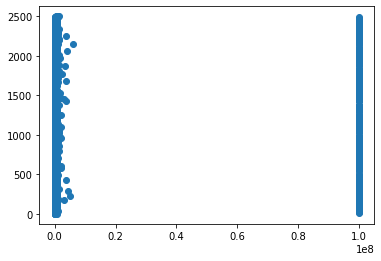

In [645]:
# повторяем тоже самое для тестовой выборки
plt.scatter(test_data['Current Loan Amount'], test_data.index)

In [646]:
test_data.loc[(test_data['Current Loan Amount'] == test_data['Current Loan Amount'].max())]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
17,Home Mortgage,1246495.0,9.0,0.0,10.0,22.9,357456.0,0.0,40.0,0.0,debt consolidation,Short Term,99999999.0,294823.0,21086.0,729.0
22,Own Home,960735.0,8.0,0.0,17.0,11.8,512380.0,0.0,29.0,0.0,debt consolidation,Short Term,99999999.0,164179.0,17133.0,733.0
33,Rent,743888.0,1.0,0.0,11.0,20.0,927124.0,0.0,18.0,0.0,debt consolidation,Short Term,99999999.0,303468.0,15002.0,735.0
45,Home Mortgage,1768729.0,10.0,0.0,11.0,19.7,3462558.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,1764321.0,29184.0,737.0
59,Rent,1984512.0,5.0,0.0,11.0,10.5,286088.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,134653.0,25964.0,745.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444,Rent,5997920.0,2.0,0.0,11.0,17.6,1178584.0,0.0,46.0,0.0,debt consolidation,Short Term,99999999.0,350151.0,39686.0,750.0
2457,Home Mortgage,1437502.0,10.0,0.0,16.0,13.0,750970.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,71991.0,25396.0,747.0
2461,Rent,613225.0,3.0,0.0,6.0,16.8,188078.0,0.0,NaN,0.0,other,Short Term,99999999.0,13319.0,7665.0,749.0
2467,Home Mortgage,939075.0,4.0,0.0,21.0,16.7,577940.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,269534.0,17216.0,737.0


In [647]:
test_temp = test_data.loc[(test_data['Term'] == 'Short Term')]
month_median_short = test_temp['Current Loan Amount'].median() / test_temp['Monthly Debt'].median()
month_median_short

20.88012434427822

In [648]:
test_data.loc[(test_data['Current Loan Amount'] == test_data['Current Loan Amount'].max()) 
               & (test_data['Term'] == 'Short Term')
               & (test_data['Monthly Debt'] * month_median_short > test_data['Current Credit Balance']),
               ['Current Loan Amount']] = test_data['Monthly Debt'] * month_median_short

In [649]:
test_data.loc[(test_data['Current Loan Amount'] == test_data['Current Loan Amount'].max()) 
               & (test_data['Term'] == 'Short Term')
               & (test_data['Monthly Debt'] * month_median_short <= test_data['Current Credit Balance']),
               ['Current Loan Amount']] = test_data['Current Credit Balance']

In [650]:
test_temp = test_data.loc[(test_data['Term'] == 'Long Term')]
month_median_long = test_temp['Current Loan Amount'].median() / test_temp['Monthly Debt'].median()
month_median_long

22.9435543505053

In [651]:
test_data.loc[(test_data['Current Loan Amount'] == test_data['Current Loan Amount'].max()) 
               & (test_data['Term'] == 'Long Term')
               & (test_data['Monthly Debt'] * month_median_long > test_data['Current Credit Balance']),
               ['Current Loan Amount']] = test_data['Monthly Debt'] * month_median_long

In [652]:
test_data.loc[(test_data['Current Loan Amount'] == test_data['Current Loan Amount'].max()) 
               & (test_data['Term'] == 'Long Term')
               & (test_data['Monthly Debt'] * month_median_long <= test_data['Current Credit Balance']),
               ['Current Loan Amount']] = test_data['Current Credit Balance']

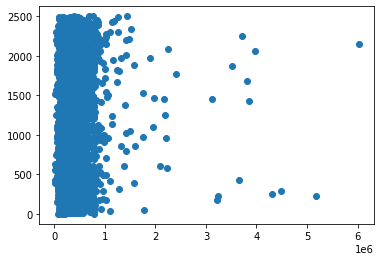

In [653]:
plt.scatter(test_data['Current Loan Amount'], test_data.index)

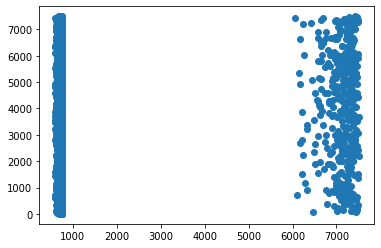

In [654]:
# Credit Score - это должно быть число от 300 до 900 => остальные значения - выбросы
plt.scatter(train_data['Credit Score'], train_data.index)

In [655]:
# ищем медиану признака Credit Score без выбросов
train_temp = train_data.loc[(train_data['Credit Score'] >= 300) & (train_data['Credit Score'] <= 900)]
median_credit_score = train_temp['Credit Score'].median()
median_credit_score

729.0

In [656]:
# заменяем выбросы на медиану
train_data.loc[(train_data['Credit Score'] < 300) | (train_data['Credit Score'] > 900), ['Credit Score']] = median_credit_score

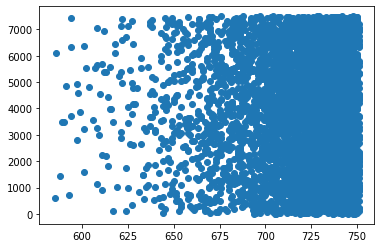

In [657]:
plt.scatter(train_data['Credit Score'], train_data.index)

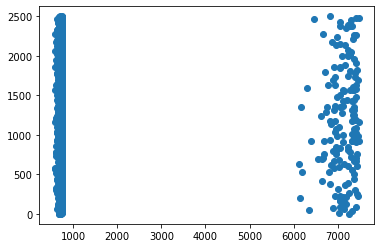

In [658]:
# повторяем для test
plt.scatter(test_data['Credit Score'], test_data.index)

In [659]:
test_temp = test_data.loc[(test_data['Credit Score'] >= 300) & (test_data['Credit Score'] <= 900)]
median_credit_score = test_temp['Credit Score'].median()
median_credit_score

728.0

In [660]:
test_data.loc[(test_data['Credit Score'] < 300) | (test_data['Credit Score'] > 900), ['Credit Score']] = median_credit_score

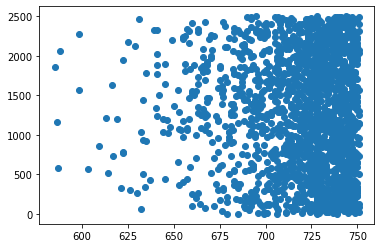

In [661]:
plt.scatter(test_data['Credit Score'], test_data.index)

In [662]:
# обработка Null значений, заменим из на соответствуюзие медианы
train_data.isnull().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
dtype: int64

In [663]:
train_data.loc[(train_data['Annual Income'].isnull(), ['Annual Income'])] = train_data['Annual Income'].median()
train_data.loc[(train_data['Years in current job'].isnull(), ['Years in current job'])] = train_data['Years in current job'].median()
train_data.loc[(train_data['Months since last delinquent'].isnull(), ['Months since last delinquent'])] = train_data['Months since last delinquent'].median()
train_data.loc[(train_data['Bankruptcies'].isnull(), ['Bankruptcies'])] = train_data['Bankruptcies'].median()
train_data.loc[(train_data['Credit Score'].isnull(), ['Credit Score'])] = train_data['Credit Score'].median()

In [664]:
train_data.isnull().sum()

Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
dtype: int64

In [665]:
# повторяем для test
test_data.isnull().sum()

Home Ownership                     0
Annual Income                    513
Years in current job              86
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    1358
Bankruptcies                       3
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                     513
dtype: int64

In [666]:
test_data.loc[(test_data['Annual Income'].isnull(), ['Annual Income'])] = test_data['Annual Income'].median()
test_data.loc[(test_data['Years in current job'].isnull(), ['Years in current job'])] = test_data['Years in current job'].median()
test_data.loc[(test_data['Months since last delinquent'].isnull(), ['Months since last delinquent'])] = test_data['Months since last delinquent'].median()
test_data.loc[(test_data['Bankruptcies'].isnull(), ['Bankruptcies'])] = test_data['Bankruptcies'].median()
test_data.loc[(test_data['Credit Score'].isnull(), ['Credit Score'])] = test_data['Credit Score'].median()

In [667]:
test_data.isnull().sum()

Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
dtype: int64

In [668]:
# переведем значения текстовых переменных в дамми переменные
train_data.dtypes

Home Ownership                   object
Annual Income                   float64
Years in current job            float64
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
dtype: object

In [669]:
train_data['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [670]:
train_data['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [671]:
train_data['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

In [672]:
train_data = pd.concat([train_data, pd.get_dummies(train_data['Home Ownership'], prefix='Home Ownership')], axis=1)
train_data = pd.concat([train_data, pd.get_dummies(train_data['Purpose'], prefix='Purpose')], axis=1)
train_data = pd.concat([train_data, pd.get_dummies(train_data['Term'], prefix='Term')], axis=1)

In [673]:
train_data.head(2)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_business loan,Purpose_buy a car,Purpose_buy house,Purpose_debt consolidation,Purpose_educational expenses,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
0,Own Home,482087.0,6.0,0.0,11.0,26.3,685960.0,1.0,32.0,1.0,debt consolidation,Short Term,164037.746201,47386.0,7914.0,749.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Own Home,1025487.0,10.0,0.0,15.0,15.3,1181730.0,0.0,32.0,0.0,debt consolidation,Long Term,394972.000000,264968.0,18373.0,737.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [674]:
test_data = pd.concat([test_data, pd.get_dummies(test_data['Home Ownership'], prefix='Home Ownership')], axis=1)
test_data = pd.concat([test_data, pd.get_dummies(test_data['Purpose'], prefix='Purpose')], axis=1)
test_data = pd.concat([test_data, pd.get_dummies(test_data['Term'], prefix='Term')], axis=1)

In [675]:
test_data.head(2)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_business loan,Purpose_buy a car,Purpose_buy house,Purpose_debt consolidation,Purpose_educational expenses,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
0,Rent,1178475.0,4.0,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,728.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,Rent,231838.0,1.0,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [676]:
train_data.shape

(7500, 37)

In [677]:
test_data.shape

(2500, 36)

In [678]:
# не совпадает кол-во колонок - не хватает колонки Purpose_renewable energy
test_data['Purpose'].value_counts()

debt consolidation      1973
other                    240
home improvements        140
buy a car                 34
business loan             30
medical bills             27
buy house                 19
take a trip               14
major purchase             9
small business             5
vacation                   3
educational expenses       3
wedding                    2
moving                     1
Name: Purpose, dtype: int64

In [679]:
temp_data = pd.Series(np.linspace(0, 0, 2500))
temp_data

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2495    0.0
2496    0.0
2497    0.0
2498    0.0
2499    0.0
Length: 2500, dtype: float64

In [680]:
test_data['Purpose_renewable energy'] = temp_data 

In [681]:
test_data.head(2)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_business loan,Purpose_buy a car,Purpose_buy house,Purpose_debt consolidation,Purpose_educational expenses,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term,Purpose_renewable energy
0,Rent,1178475.0,4.0,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,728.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0
1,Rent,231838.0,1.0,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.0


In [682]:
train_data = train_data.drop(['Home Ownership'], axis ='columns')
train_data = train_data.drop(['Purpose'], axis ='columns')
train_data = train_data.drop(['Term'], axis ='columns')

In [683]:
test_data = test_data.drop(['Home Ownership'], axis ='columns')
test_data = test_data.drop(['Purpose'], axis ='columns')
test_data = test_data.drop(['Term'], axis ='columns')

In [684]:
train_data.shape

(7500, 34)

In [685]:
test_data.shape

(2500, 34)

In [687]:
test_data

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_business loan,Purpose_buy a car,Purpose_buy house,Purpose_debt consolidation,Purpose_educational expenses,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term,Purpose_renewable energy
0,1178475.0,4.0,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,1.624700e+05,105906.0,6813.0,728.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0
1,231838.0,1.0,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,7.829800e+04,46037.0,2318.0,699.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.0
2,1152540.0,3.0,0.0,10.0,13.7,204600.0,0.0,30.0,0.0,2.001780e+05,146490.0,18729.0,728.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0
3,1220313.0,10.0,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,2.173820e+05,213199.0,27559.0,739.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0
4,2340952.0,6.0,0.0,11.0,23.6,1207272.0,0.0,30.0,0.0,7.776340e+05,425391.0,42605.0,706.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1020053.0,10.0,0.0,14.0,29.1,559152.0,1.0,68.0,1.0,3.141624e+05,162735.0,15046.0,745.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0
2496,1178475.0,2.0,0.0,15.0,17.0,1737780.0,0.0,77.0,0.0,1.439269e+06,468512.0,32996.0,728.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0
2497,1171806.0,2.0,0.0,48.0,12.8,1706430.0,0.0,30.0,0.0,6.764380e+05,430496.0,36912.0,695.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0
2498,723520.0,10.0,0.0,14.0,28.8,945780.0,0.0,30.0,0.0,3.912480e+05,257774.0,13506.0,744.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0


In [ ]:
# масштабирование данных

In [688]:
scaler_1 = StandardScaler()
train_data_scaled_st = pd.DataFrame(scaler_1.fit_transform(train_data), columns=train_data.columns)
test_data_scaled_st = pd.DataFrame(scaler_1.fit_transform(test_data), columns=test_data.columns)
train_data_scaled_st.head()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_business loan,Purpose_buy a car,Purpose_buy house,Purpose_debt consolidation,Purpose_educational expenses,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
0,-1.114304,0.032226,-0.110953,-0.026674,1.133645,0.000287,1.664779,-0.083484,2.545732,-0.728343,-0.909626,-0.872085,1.086630,-0.040032,-0.970307,3.254530,-0.863603,-0.132291,-0.113868,-0.067483,0.511641,-0.036539,-0.241094,-0.073225,-0.097761,-0.038325,-0.311919,-0.016332,-0.058981,-0.070412,-0.032677,-0.044766,-0.591517,0.591517
1,-0.396190,1.165605,-0.110953,0.788223,-0.428528,0.392674,-0.340979,-0.083484,-0.337099,0.011619,0.216931,0.004909,0.587601,-0.040032,-0.970307,3.254530,-0.863603,-0.132291,-0.113868,-0.067483,0.511641,-0.036539,-0.241094,-0.073225,-0.097761,-0.038325,-0.311919,-0.016332,-0.058981,-0.070412,-0.032677,-0.044766,1.690569,-1.690569
2,-0.758385,0.598916,-0.110953,-0.026674,2.369181,0.393231,-0.340979,-0.083484,-0.337099,-0.265811,0.441748,-0.391034,0.795530,-0.040032,1.030601,-0.307264,-0.863603,-0.132291,-0.113868,-0.067483,0.511641,-0.036539,-0.241094,-0.073225,-0.097761,-0.038325,-0.311919,-0.016332,-0.058981,-0.070412,-0.032677,-0.044766,-0.591517,0.591517
3,-0.687478,0.032226,-0.110953,-0.637847,0.593985,-0.425967,1.664779,-0.083484,2.545732,-0.864976,-0.658672,-0.584980,-1.200586,-0.040032,-0.970307,3.254530,-0.863603,-0.132291,-0.113868,-0.067483,0.511641,-0.036539,-0.241094,-0.073225,-0.097761,-0.038325,-0.311919,-0.016332,-0.058981,-0.070412,-0.032677,-0.044766,-0.591517,0.591517
4,-0.725543,0.598916,-0.110953,0.380774,-0.669954,-0.237252,1.664779,-0.083484,-0.337099,-0.850736,-0.671854,-0.933631,-0.160942,-0.040032,-0.970307,-0.307264,1.157940,-0.132291,-0.113868,-0.067483,0.511641,-0.036539,-0.241094,-0.073225,-0.097761,-0.038325,-0.311919,-0.016332,-0.058981,-0.070412,-0.032677,-0.044766,-0.591517,0.591517


In [690]:
scaler_2 = MinMaxScaler()
train_data_scaled_mm = pd.DataFrame(scaler_2.fit_transform(train_data), columns=train_data.columns)
test_data_scaled_mm = pd.DataFrame(scaler_2.fit_transform(test_data), columns=test_data.columns)
train_data_scaled_mm.head()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_business loan,Purpose_buy a car,Purpose_buy house,Purpose_debt consolidation,Purpose_educational expenses,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
0,0.031798,0.6,0.0,0.219512,0.415270,0.011917,0.142857,0.271186,0.25,0.025210,0.011151,0.057902,0.987952,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.086221,1.0,0.0,0.317073,0.210428,0.020529,0.000000,0.271186,0.00,0.060701,0.062350,0.134424,0.915663,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.058771,0.8,0.0,0.219512,0.577281,0.020542,0.000000,0.271186,0.00,0.047395,0.072568,0.099876,0.945783,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.064145,0.6,0.0,0.146341,0.344507,0.002561,0.142857,0.271186,0.25,0.018657,0.022556,0.082953,0.656627,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.061260,0.8,0.0,0.268293,0.178771,0.006703,0.142857,0.271186,0.00,0.019340,0.021957,0.052532,0.807229,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [689]:
scaler_3 = Normalizer()
train_data_scaled_n = pd.DataFrame(scaler_3.fit_transform(train_data), columns=train_data.columns)
test_data_scaled_n = pd.DataFrame(scaler_3.fit_transform(test_data), columns=test_data.columns)
train_data_scaled_n.head()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_business loan,Purpose_buy a car,Purpose_buy house,Purpose_debt consolidation,Purpose_educational expenses,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
0,0.563405,0.000007,0.0,0.000013,0.000031,0.801667,0.000001,0.000037,0.000001,0.191707,0.055379,0.009249,0.000875,0.0,0.000000e+00,1.168679e-06,0.000000,0.0,0.0,0.0,1.168679e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.168679e-06
1,0.627041,0.000006,0.0,0.000009,0.000009,0.722577,0.000000,0.000020,0.000000,0.241508,0.162017,0.011234,0.000451,0.0,0.000000e+00,6.114569e-07,0.000000,0.0,0.0,0.0,6.114569e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.114569e-07,0.000000e+00
2,0.512082,0.000005,0.0,0.000007,0.000024,0.805820,0.000000,0.000022,0.000000,0.210165,0.210165,0.009303,0.000506,0.0,6.814930e-07,0.000000e+00,0.000000,0.0,0.0,0.0,6.814930e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,6.814930e-07
3,0.966450,0.000007,0.0,0.000010,0.000027,0.176947,0.000001,0.000038,0.000001,0.145731,0.115070,0.013611,0.000833,0.0,0.000000e+00,1.200457e-06,0.000000,0.0,0.0,0.0,1.200457e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.200457e-06
4,0.881180,0.000009,0.0,0.000015,0.000015,0.437984,0.000001,0.000036,0.000000,0.142848,0.105920,0.008150,0.000816,0.0,0.000000e+00,0.000000e+00,0.000001,0.0,0.0,0.0,1.135155e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.135155e-06


Text(0, 0.5, 'кредитный рейтинг')

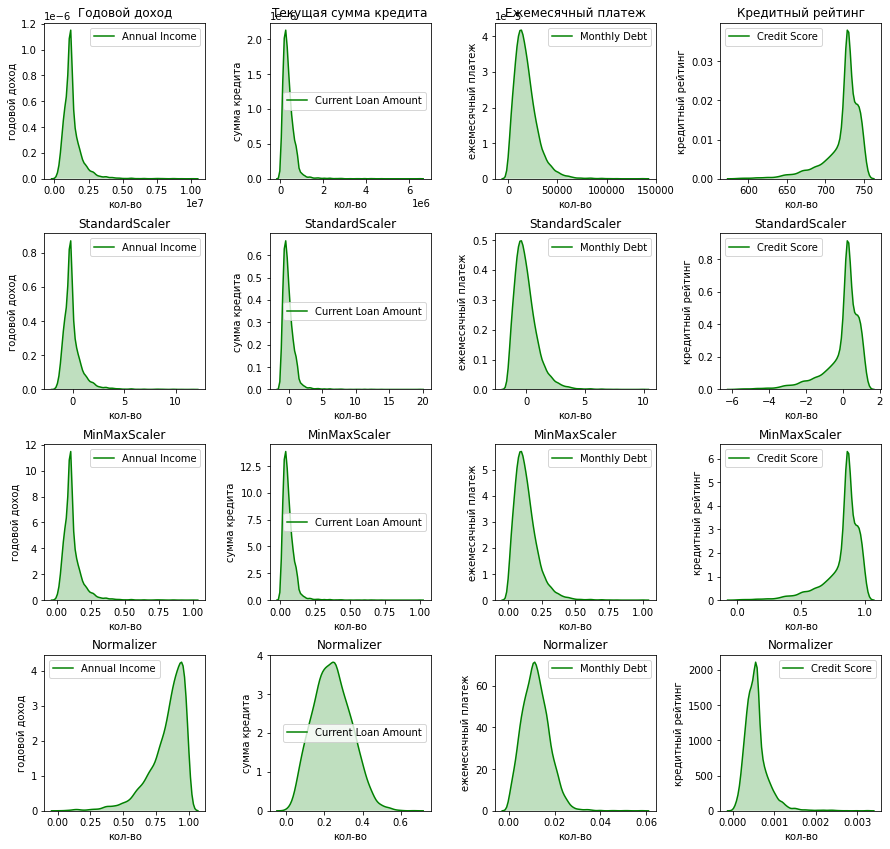

In [697]:
# графики распределения плотности
plt.figure(figsize = ([15,30]))

plt.subplots_adjust(wspace=0.4, hspace=0.35)

plt.subplot(8,4,1)
sns.kdeplot(train_data['Annual Income'], shade=True, color="g")
plt.title('Годовой доход')
plt.xlabel('кол-во')
plt.ylabel('годовой доход')

plt.subplot(8,4,5)
sns.kdeplot(train_data_scaled_st['Annual Income'], shade=True, color="g")
plt.title('StandardScaler')
plt.xlabel('кол-во')
plt.ylabel('годовой доход')

plt.subplot(8,4,9)
sns.kdeplot(train_data_scaled_mm['Annual Income'], shade=True, color="g")
plt.title('MinMaxScaler')
plt.xlabel('кол-во')
plt.ylabel('годовой доход')

plt.subplot(8,4,13)
sns.kdeplot(train_data_scaled_n['Annual Income'], shade=True, color="g")
plt.title('Normalizer')
plt.xlabel('кол-во')
plt.ylabel('годовой доход')


plt.subplot(8,4,2)
sns.kdeplot(train_data['Current Loan Amount'], shade=True, color="g")
plt.title('Текущая сумма кредита')
plt.xlabel('кол-во')
plt.ylabel('сумма кредита')

plt.subplot(8,4,6)
sns.kdeplot(train_data_scaled_st['Current Loan Amount'], shade=True, color="g")
plt.title('StandardScaler')
plt.xlabel('кол-во')
plt.ylabel('сумма кредита')

plt.subplot(8,4,10)
sns.kdeplot(train_data_scaled_mm['Current Loan Amount'], shade=True, color="g")
plt.title('MinMaxScaler')
plt.xlabel('кол-во')
plt.ylabel('сумма кредита')

plt.subplot(8,4,14)
sns.kdeplot(train_data_scaled_n['Current Loan Amount'], shade=True, color="g")
plt.title('Normalizer')
plt.xlabel('кол-во')
plt.ylabel('сумма кредита')


plt.subplot(8,4,3)
sns.kdeplot(train_data['Monthly Debt'], shade=True, color="g")
plt.title('Ежемесячный платеж')
plt.xlabel('кол-во')
plt.ylabel('ежемесячный платеж')

plt.subplot(8,4,7)
sns.kdeplot(train_data_scaled_st['Monthly Debt'], shade=True, color="g")
plt.title('StandardScaler')
plt.xlabel('кол-во')
plt.ylabel('ежемесячный платеж')

plt.subplot(8,4,11)
sns.kdeplot(train_data_scaled_mm['Monthly Debt'], shade=True, color="g")
plt.title('MinMaxScaler')
plt.xlabel('кол-во')
plt.ylabel('ежемесячный платеж')

plt.subplot(8,4,15)
sns.kdeplot(train_data_scaled_n['Monthly Debt'], shade=True, color="g")
plt.title('Normalizer')
plt.xlabel('кол-во')
plt.ylabel('ежемесячный платеж')


plt.subplot(8,4,4)
sns.kdeplot(train_data['Credit Score'], shade=True, color="g")
plt.title('Кредитный рейтинг')
plt.xlabel('кол-во')
plt.ylabel('кредитный рейтинг')

plt.subplot(8,4,8)
sns.kdeplot(train_data_scaled_st['Credit Score'], shade=True, color="g")
plt.title('StandardScaler')
plt.xlabel('кол-во')
plt.ylabel('кредитный рейтинг')

plt.subplot(8,4,12)
sns.kdeplot(train_data_scaled_mm['Credit Score'], shade=True, color="g")
plt.title('MinMaxScaler')
plt.xlabel('кол-во')
plt.ylabel('кредитный рейтинг')

plt.subplot(8,4,16)
sns.kdeplot(train_data_scaled_n['Credit Score'], shade=True, color="g")
plt.title('Normalizer')
plt.xlabel('кол-во')
plt.ylabel('кредитный рейтинг')